In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import os

In [2]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [6]:
from src.features import build_features

In [3]:
df = pd.read_pickle('data/processed/train_data.pkl')

# Set up data

In [4]:
data = df.values
y = data[:,1:3]
X = data[:,3:]

In [7]:
pl = build_features.preprocess_pipeline_clf()

In [9]:
X = pl.fit_transform(X)

# PCA

In [10]:
pca = PCA()
pca.fit(X)

PCA()

Text(0.5, 1.0, 'No. of Comp. vs. Explained Variance')

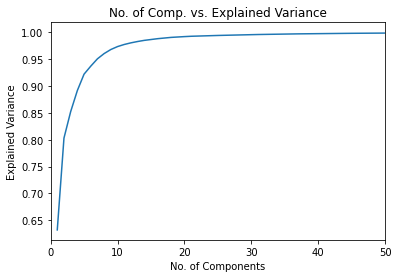

In [15]:
plt.plot(list(range(1,130)),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,50)
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('No. of Comp. vs. Explained Variance')

In [16]:
len([pca for pca in np.cumsum(pca.explained_variance_ratio_) if pca < .999])

57

In [17]:
# Transform preprocessed feature data into PCA space
X_pca = pca.transform(X)

In [20]:
# Create a dataframe of the features (sensor array data & sample no) and the responses (Gas ID and Concentration)
pca_data = np.concatenate((y,X_pca),axis=1)
pca_df = pd.DataFrame(pca_data, columns=list(df.columns.values[1:3])+['PCA_{}'.format(pca) for pca in range(1,130)])

## 2-D Plots

Text(0.5, 1.0, 'First Two PCs Colored by Gas ID')

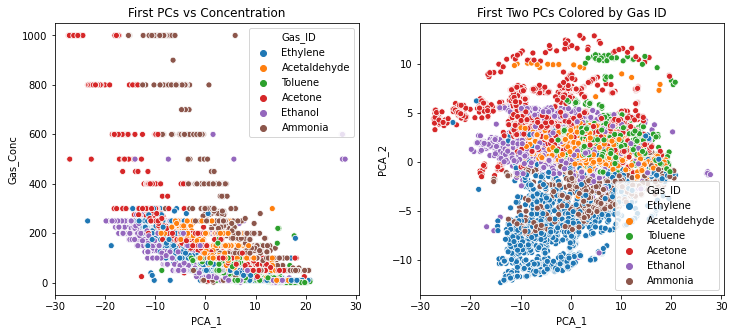

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x='PCA_1',y='Gas_Conc',data=pca_df,hue='Gas_ID', ax=ax[0])
sns.scatterplot(x='PCA_1',y='PCA_2',data=pca_df,hue='Gas_ID', ax=ax[1])
ax[0].set_title('First PCs vs Concentration')
ax[1].set_title('First Two PCs Colored by Gas ID')

## 3-D Plots

In [27]:
fig = px.scatter_3d(pca_df, x='PCA_1', y='PCA_2', z='Gas_Conc',
              color='Gas_ID', title="First Two PCs vs Gas Conc")
fig.show()

In [28]:
fig = px.scatter_3d(pca_df, x='PCA_1', y='PCA_2', z='PCA_3',
              color='Gas_ID', title='First Three PCs Colored by Gas')
fig.show()

## Evaluating PCs

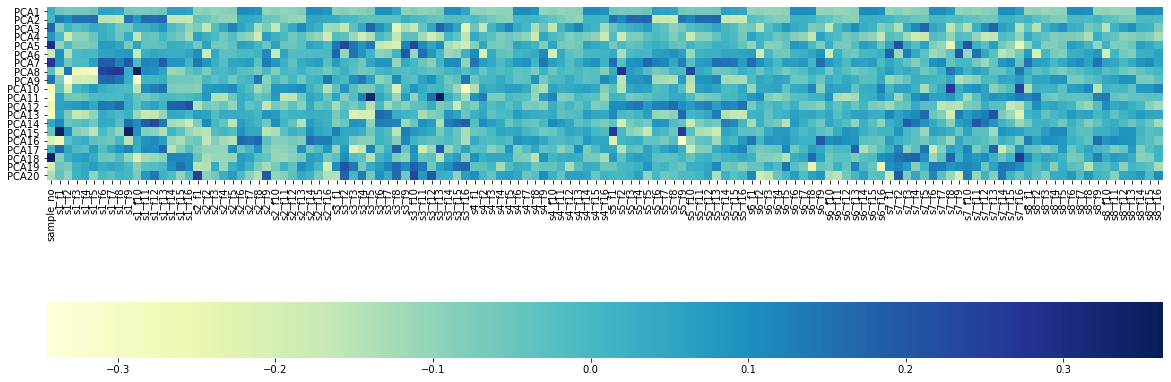

In [30]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(pca.components_[0:20,:],
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,21)],
                 xticklabels=list(df.columns.values[3:]),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")